In [1]:
#Module Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Data Imports & Subsets
data = pd.read_csv('../data/2021-SxS-Data-and-Data-Info/partial_cleaned_2021.csv')
data= data.drop(columns='Unnamed: 0')

skinny_df = data[['state','math_conf_lvl','fin_sat_lvl','fin_conf_lvl', 'ed_lvl', 'caregiver_ed_lvl', 'hh_ann_inc',
        'bill_difficulty']]

#Create subset with only the 8 states
state_df = skinny_df.query("state in ['Alabama', 'California','District of Columbia','Massachusetts', 'Oregon','Washington','West Virginia', 'Wisconsin']")

In [3]:
#Creating pivot tables for each feature 
bills_count = state_df.groupby('state')['bill_difficulty'].value_counts().reset_index()
bills_count = bills_count.pivot(index='state', columns='bill_difficulty', values='count')

income_count = state_df.groupby('state')['hh_ann_inc'].value_counts().reset_index()
income_count = income_count.pivot(index='state', columns='hh_ann_inc', values='count')

fin_sat_count = state_df.groupby('state')['fin_sat_lvl'].value_counts().reset_index()
fin_sat_count = fin_sat_count.pivot(index='state', columns='fin_sat_lvl', values='count')
fin_sat_count = fin_sat_count.drop(columns=[98,99])

fin_conf_count = state_df.groupby('state')['fin_conf_lvl'].value_counts().reset_index()
fin_conf_count = fin_conf_count.pivot(index='state', columns='fin_conf_lvl', values='count')
fin_conf_count = fin_conf_count.drop(columns=[98,99])

math_conf_count = state_df.groupby('state')['math_conf_lvl'].value_counts().reset_index()
math_conf_count = math_conf_count.pivot(index='state', columns='math_conf_lvl', values='count')
math_conf_count = math_conf_count.drop(columns=[98,99])

ed_count = state_df.groupby('state')['ed_lvl'].value_counts().reset_index()
ed_count = ed_count.pivot(index='state', columns='ed_lvl', values='count')

cgvr_ed_count = state_df.groupby('state')['caregiver_ed_lvl'].value_counts().reset_index()
cgvr_ed_count = cgvr_ed_count.pivot(index='state', columns='caregiver_ed_lvl', values='count')


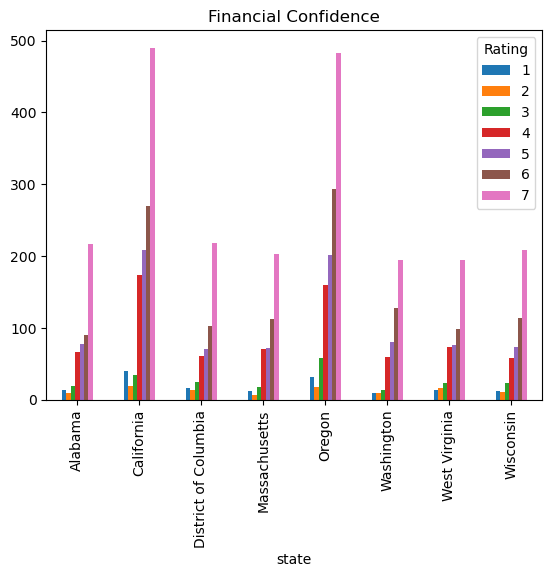

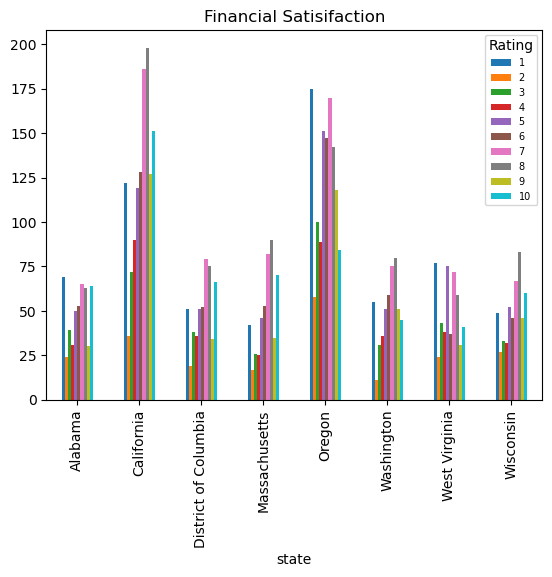

In [4]:
#Fin Confidence & Satisfaction
ax= fin_conf_count.plot(kind='bar')
plt.title('Financial Confidence')
plt.legend(title='Rating')

ax= fin_sat_count.plot(kind='bar')
plt.title('Financial Satisifaction')
plt.legend(title='Rating', prop = {"size": 7})

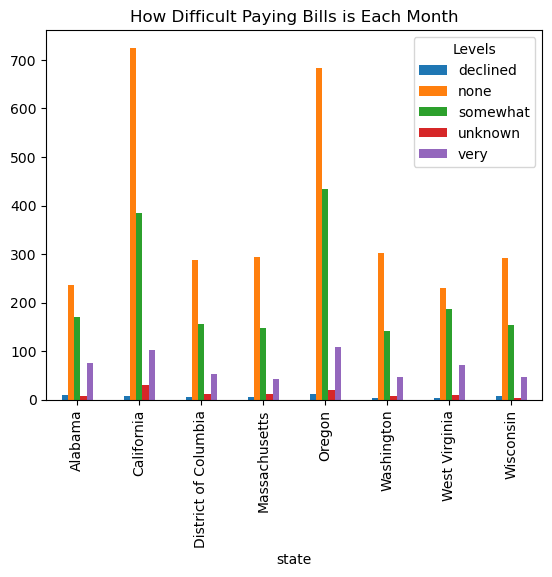

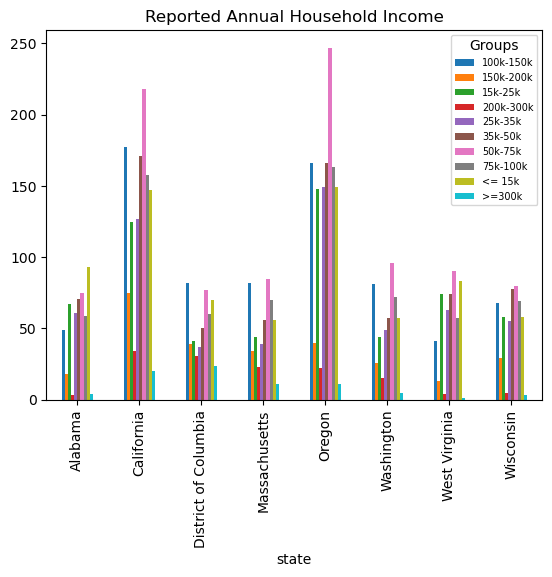

In [5]:
#Bill Difficulty  & Income

ax= bills_count.plot(kind='bar')
plt.title('How Difficult Paying Bills is Each Month')
plt.legend(title='Levels')

ax= income_count.plot(kind='bar')
plt.title('Reported Annual Household Income')
plt.legend(title='Groups', prop = {"size": 7})